In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [21]:
def combine_db_by_iso(iso, time, dbs, weights):
    v = 0
    for i in range(len(dbs)):
        try:
            v += list(dbs[i][(dbs[i]['TIME']==iso)][time])[0] * weights[i]
        except:
            v += 0
    return v

def combine_dbs_by_isoweights(dbs, weights):
    x = pd.concat(dbs)
    isos = np.insert(x['TIME'].unique(), 0, 'FLUENCE')
    times = x.columns[1:]
    y = []
    for t in times:
        temp = [t]
        for i in isos[1:]:  
            temp.append(combine_db_by_iso(i, t, dbs, weights))
        y.append(temp)
    z = pd.DataFrame(y, columns=isos)
    z['BUd'] = z['BUd'].cumsum()
    return z    

def db_slice_values(db, target_column, target_value):
    cols = db.columns
    t_array = []
    db1 = db[:1]
    db2 = db[-1:]
    x1 = db1[target_column].values[0]
    delta_x = db2[target_column].values[0] - x1
    x = target_value - x1
    for c in cols:
        if c == target_column:
            t_array.append(target_value)
        else:
            y1 = float(db1[c].values[0])
            y2 = float(db2[c].values[0])
            t_array.append(y1 + x*(y2-y1)/(delta_x))
    db.loc[-1] = t_array
    db.index =db.index + 1
    db.sort_index(inplace=True)
    return db

def iso_range(lower, upper, iso, z):
    lower = 30
    upper = 50
    BU_range = range(lower, upper)
    iso_array = np.zeros(len(BU_range))
    z1 = z[(z['BUd'] > lower) & (z['BUd'] < upper)]
    for i in range(len(BU_range)):
        z2 = db_slice_values(z1, 'BUd', BU_range[i])
        iso_array[i] = (z2[iso].values[0]/1000)
    return iso_array

In [22]:
U235 = pd.read_csv('LWRU235.csv')
U235.fillna(0, inplace=True)
U238 = pd.read_csv('LWRU238.csv')
U238.fillna(0, inplace=True)
e = 0.041
z = combine_dbs_by_isoweights([U235, U238], [e, 1.0-e])

In [47]:
lower = 30
upper = 50
vals = []
for i in np.arange(3, 5, 0.1):
    e = i*0.01
    z = combine_dbs_by_isoweights([U235, U238], [e, 1.0-e])
    vals.append(iso_range(lower, upper, 'U236', z))
vals = np.array(vals)

C:\Users\Robert\AppData\Local\Temp\ipykernel_13256\1692024532.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db.loc[-1] = t_array
C:\Users\Robert\AppData\Local\Temp\ipykernel_13256\1692024532.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db.sort_index(inplace=True)
C:\Users\Robert\AppData\Local\Temp\ipykernel_13256\1692024532.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db.loc[-1] = t_array
C:\Users\Robert\AppData\

In [48]:
vals

array([[0.00361704, 0.00363887, 0.0036607 , 0.00368254, 0.00370437,
        0.0037262 , 0.00374804, 0.00376987, 0.0037917 , 0.00381354,
        0.00383537, 0.0038572 , 0.00387904, 0.00390087, 0.0039227 ,
        0.00394454, 0.00396637, 0.0039882 , 0.00401004, 0.00403187],
       [0.00372552, 0.00374794, 0.00377036, 0.00379278, 0.0038152 ,
        0.00383762, 0.00386004, 0.00388246, 0.00390488, 0.0039273 ,
        0.00394972, 0.00397214, 0.00399456, 0.00401698, 0.0040394 ,
        0.00406182, 0.00408424, 0.00410666, 0.00412908, 0.0041515 ],
       [0.00374621, 0.00377679, 0.00380737, 0.00383795, 0.00386853,
        0.00389912, 0.0039297 , 0.00396028, 0.00399086, 0.00402144,
        0.00405202, 0.0040826 , 0.00411318, 0.00414376, 0.00417435,
        0.00420493, 0.00423551, 0.00426609, 0.00429667, 0.00432725],
       [0.0038469 , 0.00387821, 0.00390953, 0.00394085, 0.00397216,
        0.00400348, 0.0040348 , 0.00406612, 0.00409743, 0.00412875,
        0.00416007, 0.00419139, 0.0042227 , 0

<Figure size 640x480 with 0 Axes>

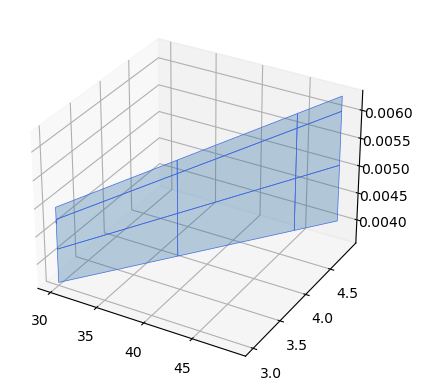

In [49]:
fig = plt.figure()
 
# syntax for 3-D projection
ax = plt.figure().add_subplot(projection='3d')
ax.plot_surface(np.arange(30,50, 1), np.arange(3, 5, 0.1), vals, edgecolor='royalblue', lw=0.5, rstride=8, cstride=8,alpha=0.3)

C:\Users\Robert\AppData\Local\Temp\ipykernel_13256\1692024532.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db.loc[-1] = t_array
C:\Users\Robert\AppData\Local\Temp\ipykernel_13256\1692024532.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db.sort_index(inplace=True)
C:\Users\Robert\AppData\Local\Temp\ipykernel_13256\1692024532.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db.loc[-1] = t_array
C:\Users\Robert\AppData\

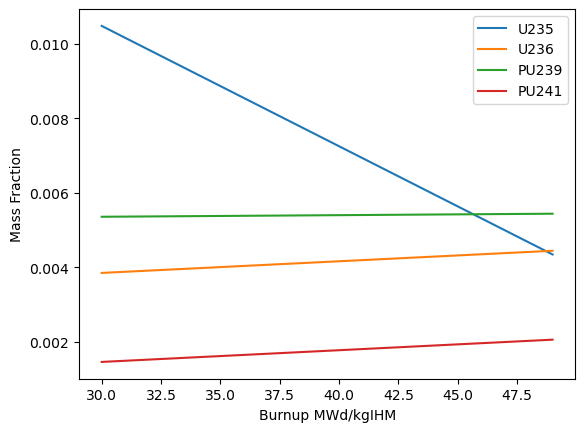

In [54]:
U235 = pd.read_csv('LWRU235.csv')
U235.fillna(0, inplace=True)
U238 = pd.read_csv('LWRU238.csv')
U238.fillna(0, inplace=True)
e = 0.033
z = combine_dbs_by_isoweights([U235, U238], [e, 1.0-e])
#plt.plot(BU_range, (PU239+PU241)/(PU240+PU242), label='FissilePU/NonFissilePU')
plt.plot(range(30,50), iso_range(lower, upper, 'U235', z), label='U235')
plt.plot(range(30,50), iso_range(lower, upper, 'U236', z), label='U236')
plt.plot(range(30,50), iso_range(lower, upper, 'PU239', z), label='PU239')
plt.plot(range(30,50), iso_range(lower, upper, 'PU241', z), label='PU241')
#plt.plot(BU_range, PU241*100, label='PU241')
#plt.plot(BU_range, U235*100, label='U235')
#plt.plot(BU_range, U236*100, label='U236')
plt.xlabel('Burnup MWd/kgIHM')
plt.ylabel('Mass Fraction')
plt.legend()

C:\Users\Robert\AppData\Local\Temp\ipykernel_13256\1692024532.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db.loc[-1] = t_array
C:\Users\Robert\AppData\Local\Temp\ipykernel_13256\1692024532.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db.sort_index(inplace=True)
C:\Users\Robert\AppData\Local\Temp\ipykernel_13256\1692024532.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db.loc[-1] = t_array
C:\Users\Robert\AppData\

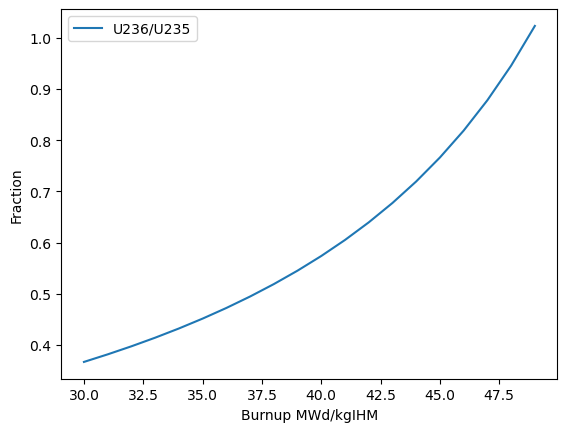

In [53]:
U235 = pd.read_csv('LWRU235.csv')
U235.fillna(0, inplace=True)
U238 = pd.read_csv('LWRU238.csv')
U238.fillna(0, inplace=True)
e = 0.033
z = combine_dbs_by_isoweights([U235, U238], [e, 1.0-e])
#plt.plot(BU_range, (PU239+PU241)/(PU240+PU242), label='FissilePU/NonFissilePU')
U236_fraction = iso_range(lower, upper, 'U236', z) /  iso_range(lower, upper, 'U235', z)
plt.plot(range(30,50), U236_fraction, label='U236/U235')
#plt.plot(BU_range, PU241*100, label='PU241')
#plt.plot(BU_range, U235*100, label='U235')
#plt.plot(BU_range, U236*100, label='U236')
plt.xlabel('Burnup MWd/kgIHM')
plt.ylabel('Fraction')
plt.legend()